# Initialize

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

import re

global PATH
PATH = '/content/drive/MyDrive/Colab Notebooks/final/enron_sent/'
#PATH = '..\\'

In [26]:
!pip install gensim -U -q

     |████████████████████████████████| 24.1 MB 78.8 MB/s 


In [27]:
import gensim

In [28]:
gensim.__version__

'4.2.0'

# Prepare dataset

In [ ]:
%%time
texts = []
users = []
folders = []
import time
start_time = time.time()
for top, dirs, files in os.walk(PATH + 'data/maildir'): #https://www.cs.cmu.edu/~enron/enron_mail_20150507.tar.gz
  # if len(top.split("/")) == 11 and 'sent' in top.split("/")[10]:
  if len(top.split("/")) == 11 and 'sent' in top.split("/")[10] and top.split("/")[9] == 'allen-p':
    for file in files:
      print(top.split("/")[9])
      text = np.array(open(os.path.join(top, file)).readlines())
      indice = np.argwhere(np.char.startswith(text,'X-FileName:'))[0][0] + 1

      if any(np.char.startswith(text,'From: ')):
        from_email_text = text[np.argwhere(np.char.startswith(text,'From: '))[0][0]]
        from_email = list(set(filter(None, from_email_text.split(':')[1].replace(' ','').replace('\n','').split(','))))
        from_emails.append(from_email)
      else:
        from_emails.append('')

      if any(np.char.startswith(text,'To: ')):
        to_email_text = text[np.argwhere(np.char.startswith(text,'To: '))[0][0]]
        to_email = list(set(filter(None, to_email_text.split(':')[1].replace(' ','').replace('\n','').split(','))))
        to_emails.append(to_email_text)
      else:
        to_emails.append('')

      texts.append(' '.join(text))
      # users.append(top.split("/")[9])
      # folders.append(top.split("/")[10])
      # paths.append(top + '/' + file)
print("--- %s seconds ---" % (time.time() - start_time))

--- 686.5560991764069 seconds ---
CPU times: user 3.4 s, sys: 816 ms, total: 4.22 s
Wall time: 11min 26s


In [ ]:
# texts = []
# from_emails = []
# to_emails = []
# users = []
# folders = []
# paths = []
# import time
# start_time = time.time()
# for top, dirs, files in os.walk(PATH + 'data\\maildir'): #https://www.cs.cmu.edu/~enron/enron_mail_20150507.tar.gz
#     if len(top.split("\\")) == 5 and 'sent' in top.split("\\")[4]:
#     #if len(top.split("\\")) == 5 and 'sent' in top.split("\\")[4] and top.split("\\")[3] == "allen-p":
#         for file in files:
#             #print(top.split("\\")[3])
#             text = np.array(open(os.path.join(top, file)).readlines())
            
#             if any(np.char.startswith(text,'From: ')):
#                 from_email_text = text[np.argwhere(np.char.startswith(text,'From: '))[0][0]]
#                 from_email = list(set(filter(None, from_email_text.split(':')[1].replace(' ','').replace('\n','').split(','))))
#                 from_emails.append(from_email)
#             else:
#                 from_emails.append('')
                
#             if any(np.char.startswith(text,'To: ')):
#                 to_email_text = text[np.argwhere(np.char.startswith(text,'To: '))[0][0]]
#                 to_email = list(set(filter(None, to_email_text.split(':')[1].replace(' ','').replace('\n','').split(','))))
#                 to_emails.append(to_email)
#             else:
#                 to_emails.append('')
            
#             texts.append(' '.join(text))
#             users.append(top.split("\\")[3])
#             folders.append(top.split("\\")[4])
#             paths.append(top + '\\' + file)
# print("--- %s seconds ---" % (time.time() - start_time))

--- 125.33381199836731 seconds ---
CPU times: total: 1min 48s
Wall time: 2min 5s


In [ ]:
df = pd.DataFrame({'text':texts,'user':users,'folder':folders,'from_email':from_emails,'to_email':to_emails, 'path':paths})

In [6]:
# df = pickle.load(open(PATH + 'visualization/data', 'rb'))
# df = pd.read_csv(PATH + 'visualization/data.csv', encoding='iso8859_10')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126057 entries, 0 to 126056
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        126057 non-null  object
 1   user        126057 non-null  object
 2   folder      126057 non-null  object
 3   from_email  126057 non-null  object
 4   to_email    125806 non-null  object
 5   path        126057 non-null  object
dtypes: object(6)
memory usage: 5.8+ MB


In [8]:
df.head()

,text,user,folder,from_email,to_email,path
0,Message-ID: <7226813.1075855681950.JavaMail.ev...,allen-p,sent,['phillip.allen@enron.com'],['pallen70@hotmail.com'],..\data\maildir\allen-p\sent\100_
1,Message-ID: <27571708.1075855681972.JavaMail.e...,allen-p,sent,['phillip.allen@enron.com'],['ina.rangel@enron.com'],..\data\maildir\allen-p\sent\101_
2,Message-ID: <10995378.1075855681995.JavaMail.e...,allen-p,sent,['phillip.allen@enron.com'],['retwell@sanmarcos.net'],..\data\maildir\allen-p\sent\102_
3,Message-ID: <15073713.1075855682016.JavaMail.e...,allen-p,sent,['phillip.allen@enron.com'],['ina.rangel@enron.com'],..\data\maildir\allen-p\sent\103_
4,Message-ID: <7937898.1075855682041.JavaMail.ev...,allen-p,sent,['phillip.allen@enron.com'],"['mike.grigsby@enron.com', 'keith.holst@enron....",..\data\maildir\allen-p\sent\104_


In [41]:
from_emails = pickle.load(open(PATH + 'visualization/from_emails','rb'))
to_emails = pickle.load(open(PATH + 'visualization/to_emails','rb'))

In [42]:
to_emails[0]

['pallen70@hotmail.com']

In [45]:
to_emails[4]

['mike.grigsby@enron.com', 'thomas.martin@enron.com', 'keith.holst@enron.com']

In [46]:
df.from_email = from_emails
df.to_email = to_emails

In [47]:
df.head()

,text,user,folder,from_email,to_email,path
0,Message-ID: <7226813.1075855681950.JavaMail.ev...,allen-p,sent,[phillip.allen@enron.com],[pallen70@hotmail.com],..\data\maildir\allen-p\sent\100_
1,Message-ID: <27571708.1075855681972.JavaMail.e...,allen-p,sent,[phillip.allen@enron.com],[ina.rangel@enron.com],..\data\maildir\allen-p\sent\101_
2,Message-ID: <10995378.1075855681995.JavaMail.e...,allen-p,sent,[phillip.allen@enron.com],[retwell@sanmarcos.net],..\data\maildir\allen-p\sent\102_
3,Message-ID: <15073713.1075855682016.JavaMail.e...,allen-p,sent,[phillip.allen@enron.com],[ina.rangel@enron.com],..\data\maildir\allen-p\sent\103_
4,Message-ID: <7937898.1075855682041.JavaMail.ev...,allen-p,sent,[phillip.allen@enron.com],"[mike.grigsby@enron.com, thomas.martin@enron.c...",..\data\maildir\allen-p\sent\104_


In [4]:
PATH + 'visualization/data'

'/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/data'

In [45]:
# pickle.dump(df,open(PATH + 'visualization/data', 'wb'))
# df = pickle.load(open(PATH + 'visualization/data', 'rb'))
# df.to_csv(PATH + 'visualization/data.csv', index=False)

In [50]:
# Check if df.from_email are all single email addresses
any([',' in i[0] for i in df.from_email.values])

False

In [51]:
df.to_email.isna().sum()

0

In [14]:
# df.to_email.fillna(' ', inplace=True)

In [33]:
# from_emails = df.from_email.values
# to_emails = df.to_email

In [ ]:
%%time
from_emails = []
to_emails_flat = []
c = 0
for k,v in enumerate(df.to_email.values):
  # print(f'v: {v}')
  for item in v:
    # print(f'item: {item}')
    if c%100 == 0 : print(f'c: {c}')
    c+=1
    from_emails.append(df.iloc[k].from_email[0])
    to_emails_flat.append(item)
    # print(f'l1: {from_emails[len(from_emails)-1]}, l2: {to_emails_flat[len(to_emails_flat)-1]}')

# Heatmap

In [48]:
df2 = pd.DataFrame({'from_email':from_emails,'to_email':to_emails_flat})

In [49]:
df2.head()

,from_email,to_email
0,phillip.allen@enron.com,pallen70@hotmail.com
1,phillip.allen@enron.com,ina.rangel@enron.com
2,phillip.allen@enron.com,retwell@sanmarcos.net
3,phillip.allen@enron.com,ina.rangel@enron.com
4,phillip.allen@enron.com,mike.grigsby@enron.com


In [53]:
df2['combination'] = df2.from_email + '|' + df2.to_email

In [54]:
df2.head()

,from_email,to_email,combination
0,phillip.allen@enron.com,pallen70@hotmail.com,phillip.allen@enron.com|pallen70@hotmail.com
1,phillip.allen@enron.com,ina.rangel@enron.com,phillip.allen@enron.com|ina.rangel@enron.com
2,phillip.allen@enron.com,retwell@sanmarcos.net,phillip.allen@enron.com|retwell@sanmarcos.net
3,phillip.allen@enron.com,ina.rangel@enron.com,phillip.allen@enron.com|ina.rangel@enron.com
4,phillip.allen@enron.com,mike.grigsby@enron.com,phillip.allen@enron.com|mike.grigsby@enron.com


In [55]:
pickle.dump(df2,open(PATH + 'visualization/df2', 'wb'))

In [123]:
df2 = pickle.load(open(PATH + 'visualization/df2', 'rb'))

In [124]:
combinations = df2.combination.value_counts().to_frame()

In [125]:
#https://stackoverflow.com/questions/480214/how-do-i-remove-duplicates-from-a-list-while-preserving-order
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [58]:
top_from_emails = list(f7([i.split('|')[0] for i in combinations.index]))[:10]

In [59]:
top_to_emails = [combinations[combinations.index.str.startswith(i)].index[0].split('|')[1] for i in top_from_emails]

In [60]:
df3 = pd.DataFrame(columns = top_from_emails)

In [61]:
for i in top_from_emails:
    lengths = []
    for i2 in top_to_emails:
        lengths.append(float(len(df2[df2.combination==(i + "|" + i2)])))
    df3.loc[len(df3)] = lengths

In [62]:
df3.index = top_to_emails

In [63]:
pickle.dump(df3,open(PATH + 'visualization/df3', 'wb'))

In [126]:
df3 = pickle.load(open(PATH + 'visualization/df3', 'rb'))

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(50.99999999999999, 0.5, 'Top 10 to emails'),
 Text(0.5, 15.0, 'Top 10 from emails')]

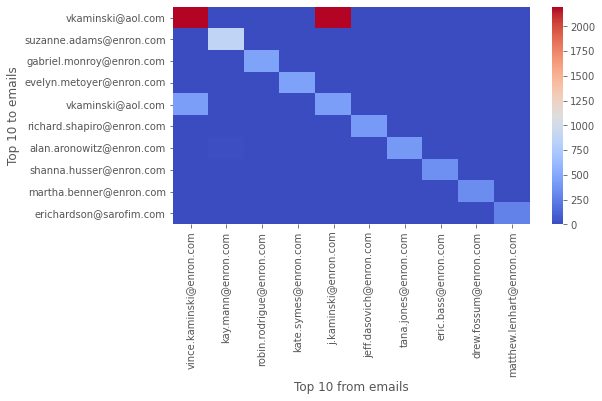

In [128]:
plt.figure(figsize=(8,4))
sns.heatmap(df3,cmap='coolwarm').set(xlabel='Top 10 from emails', ylabel='Top 10 to emails')

# Wordcloud

In [ ]:
#https://www.datacamp.com/tutorial/wordcloud-python

In [152]:
%cd '/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/wordcloud'

/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/wordcloud


In [153]:
!git clone https://github.com/amueller/word_cloud.git

Cloning into 'word_cloud'...
remote: Enumerating objects: 6589, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 6589 (delta 67), reused 123 (delta 51), pack-reused 6441
Receiving objects: 100% (6589/6589), 116.95 MiB | 12.13 MiB/s, done.
Resolving deltas: 100% (3898/3898), done.
Checking out files: 100% (95/95), done.


In [154]:
!pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [156]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

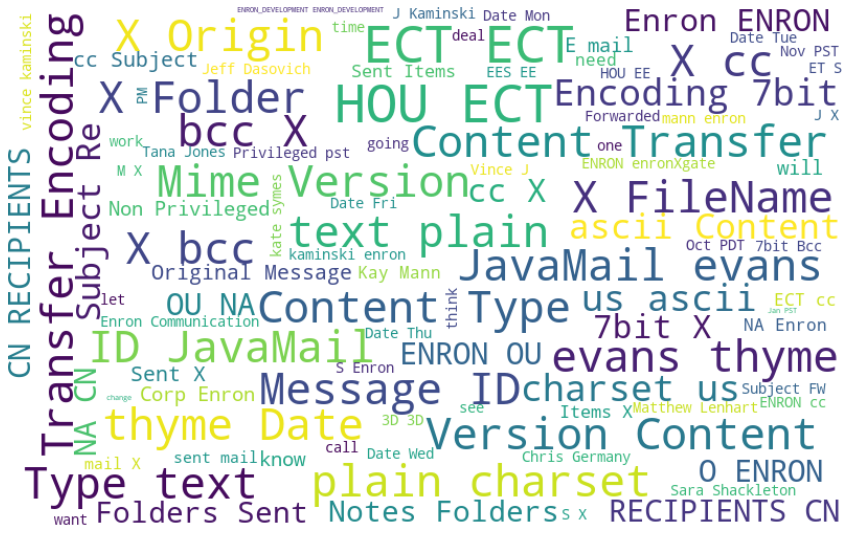

CPU times: user 2min 11s, sys: 11.1 s, total: 2min 22s
Wall time: 2min 31s


In [167]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width=800, height=500).generate(' '.join(df.text.values))
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [168]:
wordcloud.to_file('/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/wordcloud/wordcloud.png')

# Define tsne_plot

In [35]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

def tsne_plot(model, words):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab:
    for word in words:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Word2Vec

## Train model

In [ ]:
import spacy

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

!python -m spacy download en_core_web_sm -q
nlp = spacy.load('en_core_web_sm')

!pip install gensim -U -q
import gensim
print(gensim.__version__)

In [122]:
all_text = pd.DataFrame({'text_clean':df.text})
print('Number of total text documents:', len(all_text))

Number of total text documents: 126057


In [129]:
# Define function to preprocess text for a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if len(doc) > 1000000 :
            print("len exceeds 1000000, cutting doc")
            doc = doc[:999999]
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
        doc = nlp(doc, disable=['tagger'])
        # Grab lemmatized form of words and make lowercase
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        # Split into sentences based on punctuation
        doc = re.split("[\.?!;] ", doc)
        # Remove commas, periods, and other punctuation (mostly commas)
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        # Split into words
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences

In [ ]:
%%time
train_cleaned_word2vec = cleanup_text_word2vec(all_text.text_clean, logging=True)
print('Cleaned up training data size (i.e. number of sentences): ', len(train_cleaned_word2vec))

In [132]:
pickle.dump(train_cleaned_word2vec,open(PATH + 'visualization/texts/word2vec', 'wb'))

In [73]:
train_cleaned_word2vec_flat = list(set(item for sublist in train_cleaned_word2vec for item in sublist))

In [69]:
pickle.dump(train_cleaned_word2vec_flat,open(PATH + 'visualization/texts/word2vec_flat', 'wb'))

In [70]:
len(train_cleaned_word2vec_flat)

470678

In [ ]:
train_cleaned_word2vec[0]

In [ ]:
!pip install gensim -U -q

In [135]:
import gensim

In [136]:
gensim.__version__

'4.2.0'

In [137]:
%%time
from gensim.models.word2vec import Word2Vec

text_dim = 300
print("Training Word2Vec model...")
wordvec_model = Word2Vec(train_cleaned_word2vec, vector_size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")

Training Word2Vec model...
Word2Vec model created.
CPU times: user 50min 1s, sys: 6.23 s, total: 50min 7s
Wall time: 27min 56s


In [138]:
print("%d unique words represented by %d dimensional vectors" % (len(wordvec_model.wv.key_to_index), text_dim))

146080 unique words represented by 300 dimensional vectors


In [142]:
pickle.dump(wordvec_model,open(PATH + 'visualization/models/vector/word2vec_skipgram', 'wb'))

## Define plot

In [50]:
def display_closestwords_tsnescatterplot_wordvec(model, dim, words):
    
    arr = np.empty((0,dim), dtype='f')
    word_labels = words

    # get close words
    #close_words = [model.similar_by_word(word) for word in words]
    
    # add the vector for each of the closest words to the array
    close_words=[]
    for word in words:
        arr = np.append(arr, np.array([model.get_vector(word)]), axis=0)
        close_words +=model.most_similar(word)
        
    for wrd_score in close_words:
        wrd_vector = model.get_vector(wrd_score[0])
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 10)) 
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

## Plot

In [29]:
wordvec_model = pickle.load(open(PATH + 'visualization/models/vector/word2vec_skipgram', 'rb'))

In [ ]:
for word in list(wordvec_model.wv.key_to_index)[:10]:
    if word in wordvec_model.wv.key_to_index:
        print(wordvec_model.wv.get_vector(word))
        # print(word)

In [31]:
wordvec_model.wv.most_similar('vkaminski@aolcom', topn=3)

[('vincekaminski@enroncom', 0.7230567336082458),
 ('ludkam@aolcom', 0.676270604133606),
 ('vincek@lelandstanfordedu', 0.6682171821594238)]

In [32]:
wordvec_model.wv.most_similar('vincekaminski@enroncom', topn=3)

[('shirleycrenshaw@enroncom', 0.786442756652832),
 ('ziminlu@enroncom', 0.751042902469635),
 ('stevenleppard@enroncom', 0.7399678230285645)]

In [180]:
words2 = wordvec_model.wv.most_similar('vkaminski@aolcom', topn=5)
words3 = wordvec_model.wv.most_similar('vincekaminski@enroncom',topn=5)
words = [w[0] for w in words2] + [w[0] for w in words3]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


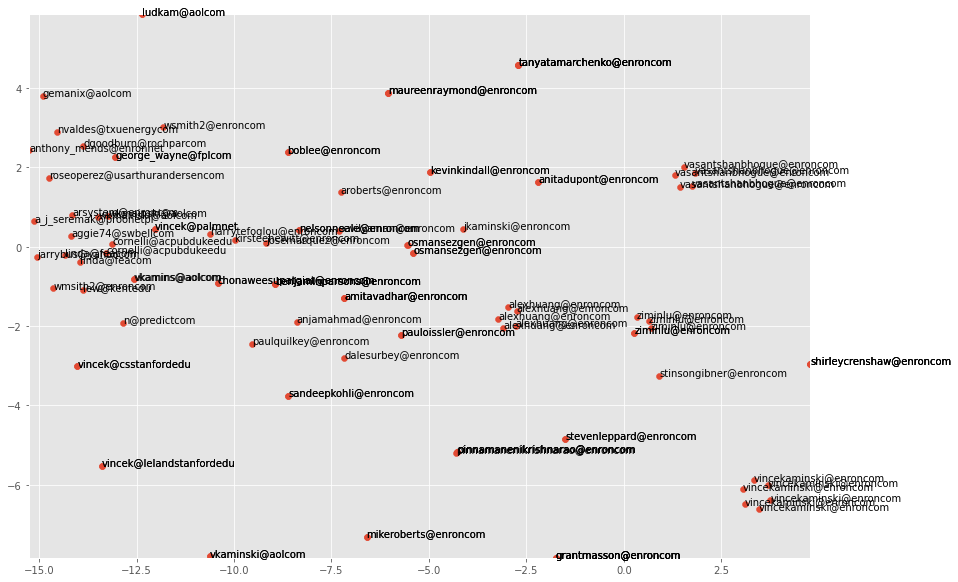

In [73]:
display_closestwords_tsnescatterplot_wordvec(wordvec_model.wv, 300, words)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


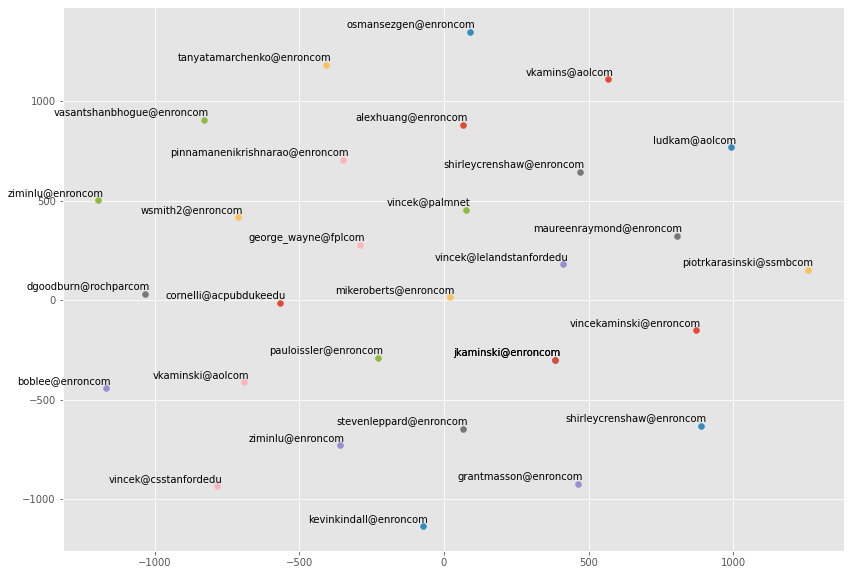

In [36]:
tsne_plot(wordvec_model.wv, words)

# Glove

## Load model

In [ ]:
#https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/embeddings/python/2020/08/15/Intro_NLP_WordEmbeddings_Classification.html

In [43]:
!pip install PyYAML -U -q

In [45]:
%cd "/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/glove/nlp-paper-implementation/glove/src/"

/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/glove/nlp-paper-implementation/glove/src


In [46]:
from pathlib import Path
import os
import argparse
import pickle

import torch
import yaml
from gensim.models.keyedvectors import KeyedVectors
from glove import GloVe
import h5py


with open("/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/glove/nlp-paper-implementation/glove/config.yaml", 'rb') as f:
    config_dict = yaml.load(f, Loader=yaml.FullLoader)
config = argparse.Namespace()
for key, value in config_dict.items():
    setattr(config, key, value)

with open(os.path.join(config.cooccurrence_dir, "vocab.pkl"), "rb") as f:
    vocab = pickle.load(f)

model = GloVe(
    vocab_size=config.vocab_size,
    embedding_size=config.embedding_size,
    x_max=config.x_max,
    alpha=config.alpha
)
model.load_state_dict(torch.load(config.output_filepath))

keyed_vectors = KeyedVectors(vector_size=config.embedding_size)
keyed_vectors.add_vectors(
    keys=[vocab.get_token(index) for index in range(config.vocab_size)],
    weights=(model.weight.weight.detach()
        + model.weight_tilde.weight.detach()).numpy()
)

In [10]:
# pickle.dump(keyed_vectors,open('/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/glove/model/keyed_vectors', 'wb'))

In [11]:
from gensim.models import Word2Vec
vectors = torch.load('/content/drive/MyDrive/Colab Notebooks/final/enron_sent/visualization/glove/model/myGloVe')

In [8]:
vectors

OrderedDict([('bias',
              tensor([-0.8505, -0.7658, -1.1529,  ..., -0.5811,  0.9409,  0.4369])),
             ('bias_tilde',
              tensor([-1.1766, -0.3027, -0.8998,  ..., -0.0727,  0.7925,  0.1677])),
             ('weight.weight',
              tensor([[ 0.6703, -1.2704,  0.0496,  ..., -0.2479, -1.5978, -0.5365],
                      [-0.5768, -0.3857, -0.0436,  ..., -0.0570,  1.4156,  0.0091],
                      [ 0.3760, -0.7139, -0.7498,  ...,  1.4912,  0.7391, -0.1205],
                      ...,
                      [-0.7127, -0.1078, -1.0179,  ..., -0.4972, -1.1619, -0.4283],
                      [ 0.4873, -0.6363,  0.8273,  ..., -0.6819,  0.8485, -0.6773],
                      [-0.7173,  1.6434, -0.5691,  ..., -0.7302,  0.0773,  0.9648]])),
             ('weight_tilde.weight',
              tensor([[ 0.4598, -0.4111, -0.3341,  ...,  0.6564,  0.9344, -1.2415],
                      [-1.3571,  0.2474, -0.1371,  ...,  0.5471,  0.0922,  0.5161],
          

In [9]:
len(vectors['bias_tilde'])

470678

In [10]:
for k,v in vectors.items():
  print(v)

tensor([-0.8505, -0.7658, -1.1529,  ..., -0.5811,  0.9409,  0.4369])
tensor([-1.1766, -0.3027, -0.8998,  ..., -0.0727,  0.7925,  0.1677])
tensor([[ 0.6703, -1.2704,  0.0496,  ..., -0.2479, -1.5978, -0.5365],
        [-0.5768, -0.3857, -0.0436,  ..., -0.0570,  1.4156,  0.0091],
        [ 0.3760, -0.7139, -0.7498,  ...,  1.4912,  0.7391, -0.1205],
        ...,
        [-0.7127, -0.1078, -1.0179,  ..., -0.4972, -1.1619, -0.4283],
        [ 0.4873, -0.6363,  0.8273,  ..., -0.6819,  0.8485, -0.6773],
        [-0.7173,  1.6434, -0.5691,  ..., -0.7302,  0.0773,  0.9648]])
tensor([[ 0.4598, -0.4111, -0.3341,  ...,  0.6564,  0.9344, -1.2415],
        [-1.3571,  0.2474, -0.1371,  ...,  0.5471,  0.0922,  0.5161],
        [-1.8180, -1.1847,  1.4065,  ...,  0.0904, -0.3236,  0.6819],
        ...,
        [-0.4408, -0.9985,  1.1606,  ..., -1.2033, -1.0110,  0.9221],
        [ 0.9120, -0.9066, -0.1012,  ..., -0.1407,  0.5661, -0.6729],
        [-0.3565, -1.0129, -0.5872,  ...,  0.8290, -2.5103,  0.06

## Define plot

In [58]:
def display_closestwords_tsnescatterplot_gensim(model, dim, words):
    
    arr = np.empty((0,dim), dtype='f')
    word_labels = words

    # get close words
    #close_words = [model.similar_by_word(word) for word in words]
    
    # add the vector for each of the closest words to the array
    close_words=[]
    for word in words:
        arr = np.append(arr, np.array([model[word]]), axis=0)
        close_words +=model.similar_by_word(word)
        
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 10)) 
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

## Plot

In [48]:
glove_model = keyed_vectors

In [49]:
len(list(keyed_vectors.key_to_index.keys()))

470678

In [101]:
[i for i in list(glove_model.key_to_index.keys()) if 'vkaminski' in i]

['09vkaminski@aolcom@enron',
 'vkaminski@aolcom@enron',
 'vkaminski@aolcom=20',
 "cc=09'vkaminski@aolcom",
 'mailtovkaminski@aolcom',
 'mailtoimceanotes-vkaminski+40aol+2ecom+40enron@enroncom',
 'vkaminski',
 'vkaminski=3daolcom@pbulk01thestreetco=',
 'mailtoimceanotes-vk+20+3cvkaminski+40aol+2ecom+3e+40enron@enroncom',
 'to<vkaminski@olcom',
 'vkaminski@olcom',
 'vkaminski+40aol+2ecom+40enron@enroncom]=20',
 'vkaminski@palmnet',
 'vkaminski@aolcom>@enron',
 'vkaminski@aolcom',
 'vkaminski@aol']

In [102]:
[i for i in list(glove_model.key_to_index.keys()) if 'vince' in i and 'kaminski' in i]

['smtpvince_j_kaminski@enroncom',
 '\\vincent_kaminski_jun2001_4\\notes',
 'smtpvincejkaminski@enroncom',
 'vincentkaminski',
 '\\vincent_kaminski_jun2001_3\\notes',
 '\\vince_kaminski_jun2001_10\\sent',
 'vince_j_kaminski@ectenronnet',
 '\\vincent_kaminski_jan2002_1\\kaminski',
 'mailtoimceanotes-vince+20kaminski+20+3cvincek+40cs+2estanford+2eedu+3e+40enron@enroncom',
 'mailtovincejkaminski@enroncom',
 '\\vincent_kaminski_jun2001_5\\notes',
 '\\vincent_kaminski_jun2001_8\\notes',
 'vince_j_kaminski@pgncom',
 'vincekaminski@enroncom',
 'vince_j_kaminski@eienroncom',
 'to<vincekaminski@enroncom',
 'vincejkaminski',
 'vincejkaminski@enroncom',
 '\\vincent_kaminski_jan2002_2\\kaminski',
 'vince_kaminski@enronnet',
 '\\vincent_kaminski_jun2001_9\\notes',
 'vincejkaminski@enroncom[smtpvincejkaminski@enroncom',
 'vinceakaminskipdf',
 'vince_j_kaminski@enroncom']

In [53]:
words = list(glove_model.key_to_index.keys())
words2 = glove_model.similar_by_word('vkaminski@aolcom',topn=15)
words3 = glove_model.similar_by_word('vincekaminski@enroncom',topn=15)
words = [w[0] for w in words2] + [w[0] for w in words3]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


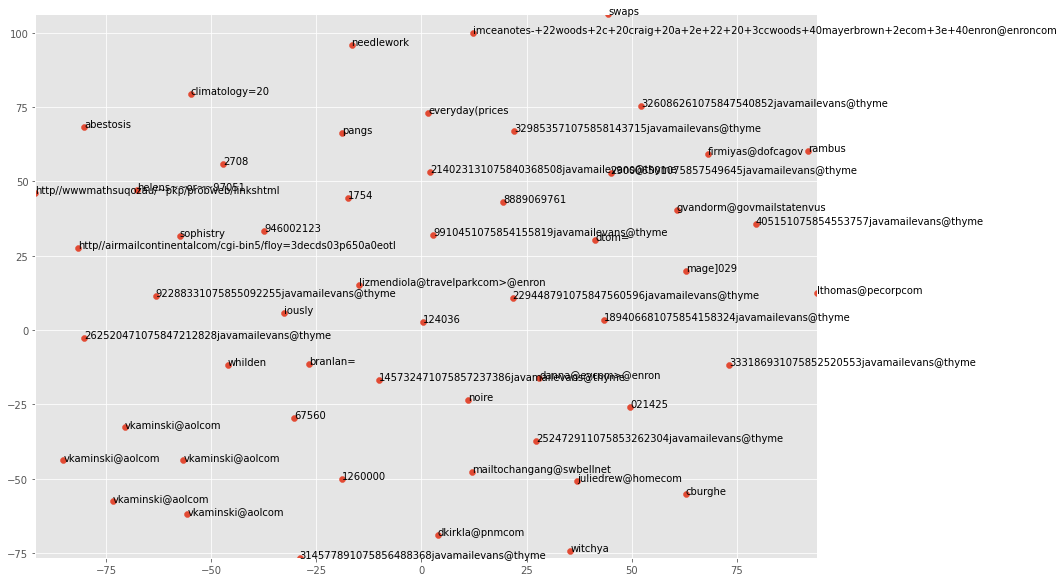

In [59]:
display_closestwords_tsnescatterplot_gensim(glove_model, 300, words[:5])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


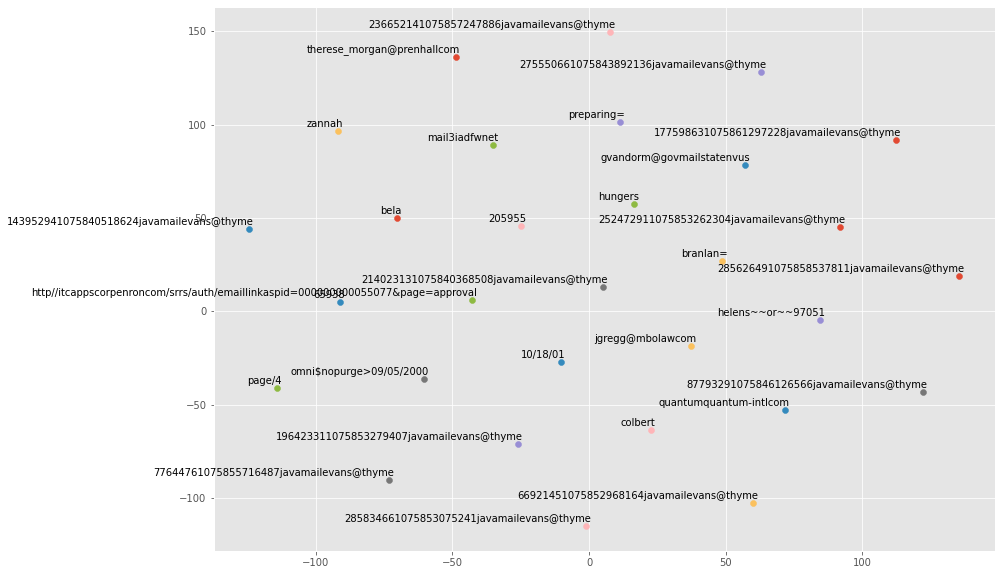

In [50]:
tsne_plot(glove_model, words)

# Spacy

## Initialize

In [ ]:
#https://stackoverflow.com/questions/57697374/list-most-similar-words-in-spacy-in-pretrained-model

In [3]:
!python -m spacy download en_core_web_lg -q

2022-11-25 00:47:38.575904: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 587.7 MB 15 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [130]:
import spacy
import numpy as np
nlp = spacy.load('en_core_web_lg')

def most_similar(word, topn=5):
    word = nlp.vocab[str(word)]
    queries = [w for w in word.vocab if w.is_lower == word.is_lower and w.prob >= -20 and np.count_nonzero(w.vector)]

    # by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
    by_similarity = sorted(queries, key=lambda w: cosine_similarity_numba(w.vector, word.vector), reverse=True)

    return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

from numba import jit

@jit(nopython=True)
def cosine_similarity_numba(u:np.ndarray, v:np.ndarray):
    assert(u.shape[0] == v.shape[0])
    uv = 0
    uu = 0
    vv = 0
    for i in range(u.shape[0]):
        uv += u[i]*v[i]
        uu += u[i]*u[i]
        vv += v[i]*v[i]
    cos_theta = 1
    if uu != 0 and vv != 0:
        cos_theta = uv/np.sqrt(uu*vv)
    return cos_theta

## Define plot

In [232]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

def tsne_plot_spacy(words):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        tokens.append(nlp.vocab.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.style.use('ggplot')
    plt.figure(figsize=(14, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Plot

In [205]:
words2 = most_similar("suzanne", topn=15)
words3 = most_similar("vince", topn=15)
words = [w[0] for w in words2] + [w[0] for w in words3]

In [234]:
words

['who’s',
 'o.o',
 'she',
 'co',
 'b.',
 'v.',
 'w.',
 'lovin',
 'j.',
 'havin',
 'who',
 "'s",
 'let’s',
 'lovin’',
 'was',
 'where',
 '’cause',
 'when',
 'had',
 'cause',
 'that',
 'there',
 "'cause",
 'was',
 'would',
 'he',
 'they',
 'who',
 'have',
 'what']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


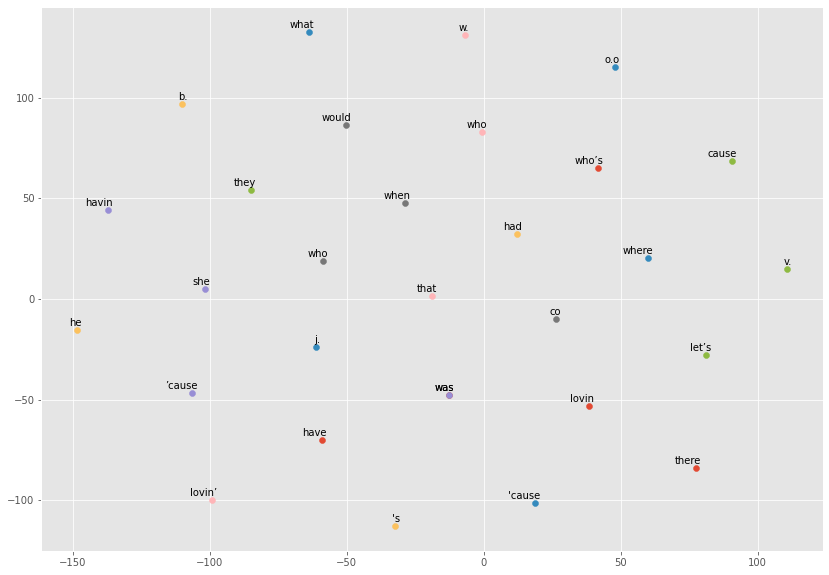

In [233]:
tsne_plot_spacy(words)